# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

---
## 2. Load data

In [2]:
client_df = pd.read_csv('client_data_after_eda.csv')

In [3]:
print(client_df.shape)
client_df.head(3)

(14606, 23)


,id,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df = pd.read_csv('price_data_after_eda.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [5]:
print(price_df.shape)
price_df.head(3)

(193002, 6)


,id,price_date,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,44.266931,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,44.266931,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,44.266931,0.0


## 3. Feature engineering

### We will create 3 different sets of price features to measure sensitivity as proposed in the EDA 

### 1) Mean of the prices (fixed & variable) from preceding year (January to December 2015)
### 2) Difference between prices (fixed & variable) from January to December 2015
### 3) Variance in prices (fixed & variable) from January to December 2015

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
# Group prices by companies and month

monthly_price_by_id = price_df.groupby(['id', 'price_date']).mean().reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,40.565969,24.339581
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,40.565969,24.339581
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,40.728885,24.437330
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,40.728885,24.437330
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,40.728885,24.437330
...,...,...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,0.102232,40.728885,24.437330
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,0.102232,40.728885,24.437330
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,0.102232,40.728885,24.437330
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,0.102232,40.728885,24.437330


In [7]:
# Create the features for mean prices, difference in prices & variance of prices for the period JAN-DEC 2015 

mean_prices = monthly_price_by_id.groupby('id').mean()

prices_first = monthly_price_by_id.groupby('id').first()
prices_last = monthly_price_by_id.groupby('id').last()
diff_prices = prices_last.iloc[:,1:] - prices_first.iloc[:,1:]

var_prices = monthly_price_by_id.groupby('id').var()

# Rename the columns
col_list = ['mean_'+col for col in mean_prices.columns]
mean_prices.columns = col_list

col_list = ['diff_'+col for col in diff_prices.columns]
diff_prices.columns = col_list

col_list = ['var_'+col for col in var_prices.columns]
var_prices.columns = col_list

In [8]:
price_df = pd.concat([mean_prices, diff_prices, var_prices], axis=1, join='inner')
price_df

,mean_price_off_peak_var,mean_price_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,diff_price_off_peak_var,diff_price_peak_var,diff_price_off_peak_fix,diff_price_peak_fix,var_price_off_peak_var,var_price_peak_var,var_price_off_peak_fix,var_price_peak_fix
id,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,40.701732,24.421038,-0.006192,-0.002302,0.162916,0.097749,0.000016,0.000004,4.021438e-03,0.001448
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,44.385450,0.000000,-0.004104,0.000000,0.177779,0.000000,0.000005,0.000000,7.661891e-03,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,45.319710,0.000000,0.050443,0.000000,1.500000,0.000000,0.000676,0.000000,5.965909e-01,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,40.647427,24.388455,-0.010018,-0.005120,0.162916,0.097749,0.000025,0.000007,7.238536e-03,0.002606
00114d74e963e47177db89bc70108537,0.147926,0.000000,44.266930,0.000000,-0.003994,0.000000,-0.000001,0.000000,0.000005,0.000000,3.490909e-13,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,40.896427,24.637456,-0.050232,-0.038788,-0.335085,-0.400251,0.000688,0.000422,3.062232e-02,0.043691
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,44.311375,0.000000,-0.003778,0.000000,0.177779,0.000000,0.000004,0.000000,6.464760e-03,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,41.160171,24.895768,-0.001760,-0.003707,0.164916,0.099749,0.000009,0.000006,7.211360e-03,0.002638


In [9]:
# Check for missing values in price_df

price_df.isnull().sum()

mean_price_off_peak_var    0
mean_price_peak_var        0
mean_price_off_peak_fix    0
mean_price_peak_fix        0
diff_price_off_peak_var    0
diff_price_peak_var        0
diff_price_off_peak_fix    0
diff_price_peak_fix        0
var_price_off_peak_var     0
var_price_peak_var         0
var_price_off_peak_fix     0
var_price_peak_fix         0
dtype: int64

### Date Features

### Since it's difficult to work directly with the date data, we will convert date columns into number of months/years from each date to the reference date of our data (January 2016)

In [10]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], format='%Y-%m-%d')
client_df['date_end'] = pd.to_datetime(client_df['date_end'], format='%Y-%m-%d')
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'], format='%Y-%m-%d')
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'], format='%Y-%m-%d')

In [11]:
# Convert date columns into number of months from each date to the reference date of our data (January 2016)

for col in ['date_activ','date_end','date_modif_prod','date_renewal']:   
    col_name = col.split('_')[1]
    reference_date = datetime(2016,1,1)
    time_delta = reference_date - client_df['date_activ']
    client_df['months'+col_name] = (time_delta / np.timedelta64(1, "M")).astype(int)
client_df.drop(['date_activ','date_end','date_modif_prod','date_renewal'], 1, inplace=True)

## 4. Encoding of Features

In [12]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,monthsactiv,monthsend,monthsmodif,monthsrenewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.00,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,30,30,30,30
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,189.95,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,76,76,76,76
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,47.96,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,68,68,68,68
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,240.04,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,69,69,69,69
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,445.75,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,71,71,71,71


In [13]:
# Do One-hot encoding for channel_sales and origin_up

dummies_channel_sales = pd.get_dummies(client_df['channel_sales'])

dummies_origin_up = pd.get_dummies(client_df['origin_up'])

In [14]:
# Rename dummy columns

col_list = ['channel_'+col[:4] for col in dummies_channel_sales.columns]
dummies_channel_sales.columns = col_list
dummies_channel_sales

,channel_MISS,channel_epum,channel_ewpa,channel_fixd,channel_foos,channel_lmke,channel_sddi,channel_usil
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
14601,0,0,0,0,1,0,0,0
14602,0,0,0,0,1,0,0,0
14603,0,0,0,0,1,0,0,0
14604,0,0,0,0,1,0,0,0


In [15]:
# Rename dummy columns

col_list = ['origin_'+col[:4] for col in dummies_origin_up.columns]
dummies_origin_up.columns = col_list
dummies_origin_up

client_df.drop(['channel_sales','origin_up'], axis=1, inplace=True)

In [16]:
# Label encoding of 'has_gas' column

client_df.has_gas.replace({'f':0,'t':1}, inplace=True)

In [17]:
# Finally merge it with price features obtained earlier

client_df = pd.concat([client_df, dummies_channel_sales, dummies_origin_up], axis=1, join='inner')

client_prices = pd.merge(client_df, price_df, how='inner', on='id')
client_prices

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,monthsactiv,monthsend,monthsmodif,monthsrenewal,channel_MISS,channel_epum,channel_ewpa,channel_fixd,channel_foos,channel_lmke,channel_sddi,channel_usil,origin_MISS,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap,mean_price_off_peak_var,mean_price_peak_var,mean_price_off_peak_fix,mean_price_peak_fix,diff_price_off_peak_var,diff_price_peak_var,diff_price_off_peak_fix,diff_price_peak_fix,var_price_off_peak_var,var_price_peak_var,var_price_off_peak_fix,var_price_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0.00,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,2,678.99,3,43.648,1,30,30,30,30,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.124787,0.100749,40.942265,22.352010,0.020057,-0.017912,3.700961,-24.339581,0.000061,2.627605e-05,1.102785e+00,49.550703
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,189.95,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,1,18.89,6,13.800,0,76,76,76,76,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.149609,0.007124,44.311375,0.000000,-0.003767,0.000000,0.177779,0.000000,0.000005,6.089453e-04,6.464779e-03,0.000000
2,764c75f661154dac3a6c254cd082ea7d,544,0,47.96,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,1,6.60,6,13.856,0,68,68,68,68,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.170512,0.088421,44.385450,0.000000,-0.004670,0.000528,0.177779,0.000000,0.000006,2.558511e-07,7.661891e-03,0.000000
3,bba03439a292a1e166f80264c16191cb,1584,0,240.04,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,1,25.46,6,13.200,0,69,69,69,69,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.151210,0.000000,44.400265,0.000000,-0.004547,0.000000,0.177779,0.000000,0.000005,0.000000e+00,6.464721e-03,0.000000
4,149d57cf92fc41cf94415803a877cb4b,4425,0,445.75,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,1,47.98,6,19.800,0,71,71,71,71,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.124174,0.103638,40.688156,24.412893,-0.006192,-0.002302,0.162916,0.097749,0.000015,3.552481e-06,5.428942e-03,0.001954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,4648.01,0.0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,2,381.77,4,15.000,0,43,43,43,43,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.144124,0.000000,44.370635,0.000000,-0.008653,0.000000,0.177779,0.000000,0.000015,0.000000e+00,8.380216e-03,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,631.69,0.0,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,1,90.34,3,6.000,1,40,40,40,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.106799,0.095406,59.015674,36.393379,-0.007395,-0.003727,0.236694,0.145963,0.000013,3.472391e-06,1.358132e-02,0.005165
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,190.39,0.0,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,1,20.38,4,15.935,1,46,46,46,46,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.124338,0.103794,40.701732,24.421038,-0.006192,-0.002302,0.162916,0.097749,0.000016,3.957295e-06,4.021438e-03,0.001448
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,19.34,0.0,7.18,0.145711,0.000000,44.311378,0,0.00,13.08,1,0.96,3,11.000,0,40,40,40,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.149609,0.007124,44.311375,0.000000,-0.003767,0.000000,0.177779,0.000000,0.000005,6.089453e-04,6.464769e-03,0.000000


## 5. Outlier Treatment and Transformation

In [18]:
# We need to treat outliers in the numerical features which were found in EDA
# Here, we are using iqr method with k=+-1.5*IQR set as the upper & lower limit of whiskers

client_prices_num = client_prices[['cons_12m','forecast_cons_12m','imp_cons','pow_max']]

# We will be using iqr method

q1 = client_prices_num.quantile(0.25)
q3 = client_prices_num.quantile(0.75)
iqr = q3-q1


client_prices_out = client_prices[~(((client_prices_num < q1-1.5*iqr) | (client_prices_num > q3+1.5*iqr)).any(axis=1))]
print('No of rows after outlier treatment =',client_prices_out.shape[0])
client_prices_out.isnull().sum().sum()

# There are no null values in the final dataframe

No of rows after outlier treatment = 10732


0

In [19]:
# List of features in different categories
client_info_columns = ['id','channel_sales', 'origin_up', 'nb_prod_act','num_years_antig','has_gas']
past_cons_columns = ['cons_12m', 'cons_gas_12m']
date_columns = [ 'months_activ','months_end', 'months_modif', 'months_renewal']
forecast_columns = ['forecast_cons_12m','forecast_price_energy_off_peak', 'forecast_price_pow_off_peak',
                    'forecast_price_energy_peak','forecast_discount_energy','forecast_meter_rent_12m']
present_cons_columns = ['imp_cons','pow_max', 'margin_gross_pow_ele', 'net_margin']

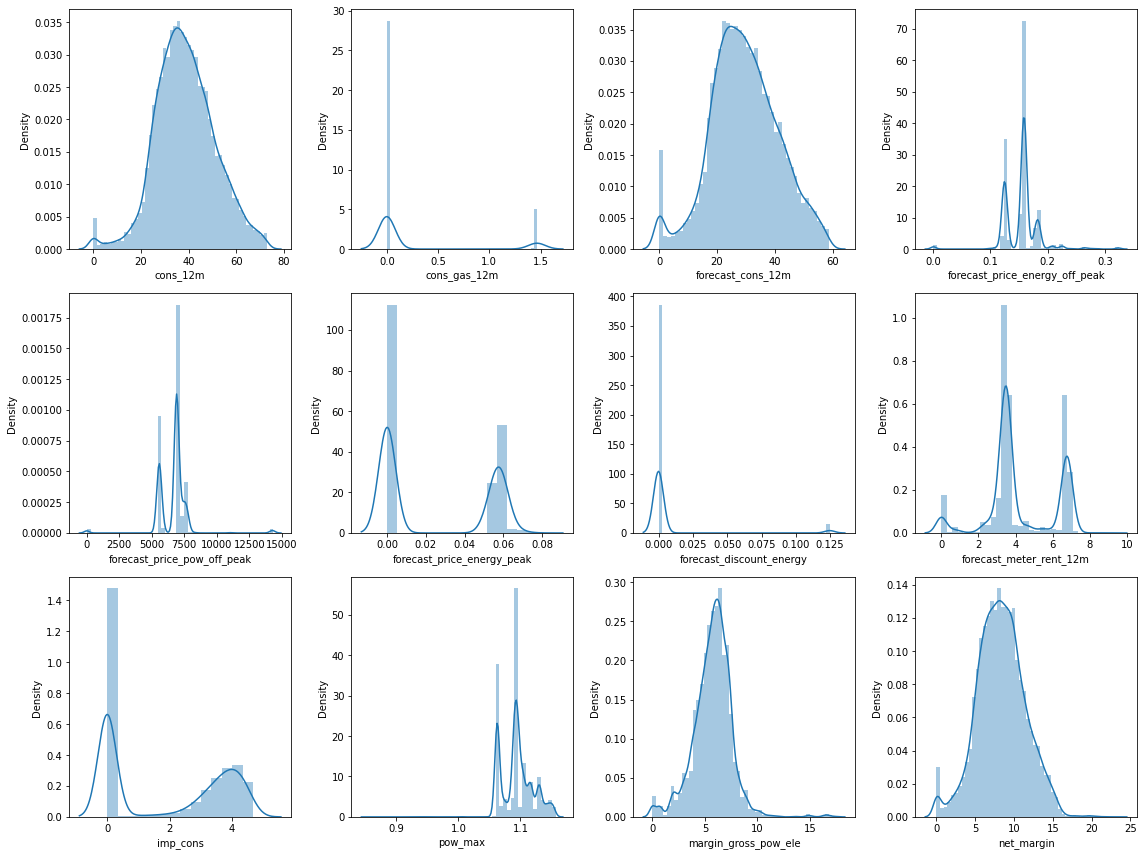

In [20]:
# Transform the highly skewed consumption and  forecast variables
# Since we are using the boxcox transformation here, we need to modify zero values by adding 1 to each.

from scipy.stats import boxcox

(client_prices_out[past_cons_columns + forecast_columns + present_cons_columns] <= 0).sum()

fig, axes = plt.subplots(3,4, figsize=(16,12))
i = 0
for col in past_cons_columns + forecast_columns + present_cons_columns:
    client_prices_out[col] = (client_prices_out[col]+1).astype('float')
    client_prices_out[col] = boxcox(client_prices_out[col])[0]
    sns.distplot(client_prices_out[col], ax=axes.flat[i])
    i=i+1
plt.tight_layout()
plt.show()

In [21]:
# Final list of features

client_prices.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'churn', 'monthsactiv', 'monthsend', 'monthsmodif',
       'monthsrenewal', 'channel_MISS', 'channel_epum', 'channel_ewpa',
       'channel_fixd', 'channel_foos', 'channel_lmke', 'channel_sddi',
       'channel_usil', 'origin_MISS', 'origin_ewxe', 'origin_kamk',
       'origin_ldks', 'origin_lxid', 'origin_usap', 'mean_price_off_peak_var',
       'mean_price_peak_var', 'mean_price_off_peak_fix', 'mean_price_peak_fix',
       'diff_price_off_peak_var', 'diff_price_peak_var',
       'diff_price_off_peak_fix', 'diff_price_peak_fix',
       'var_price_off_peak_var', 'var_price_peak_var',
       'var_price_off_peak_fix', 'var_price_peak_fix'],


## 6. Modelling

#### We will use Random Forest Classifier of sklearn and XGBoost to build our model. 
#### Random Forest Classifier (RFC) is an ensemble based model which works on the principle of bagging of decision tree models. It aggregates the results of multiple DT models working on different subsets of data. XGBoost is a boosting ensemble algorithm which acts as a general purpose good model

#### Advantages - 1) Improves predicton by aggregating the results of several models and giving the average.
#### 2) Ensemble models are  ideal when there are large no of features with low/unknown predictive power.  
#### 3) They are less sensitive to outliers and multicollinearity in features.

#### Disadvantages - 1) Interpretation of results is more difficult 2) takes more time for training

In [22]:
X = client_prices.drop(['id','churn'], 1)
y = client_prices['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10954, 45) (3652, 45)
(10954,) (3652,)


In [23]:
y_train.value_counts()

0    9890
1    1064
Name: churn, dtype: int64

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300, random_state = 10)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [25]:
# Calculate and store the prediction scores in a dataframe

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

df_scores = pd.DataFrame(columns = ['Precision','Recall','f1-score','Accuracy','Kappa'])
df_scores.loc['Random Forest'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]

In [26]:
# We will also compare with XGBoost model to assess the relative performance of both

import xgboost
xgb = xgboost.XGBClassifier(n_estimators = 300, random_state = 12, importance_type='total_gain', verbosity=0)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

df_scores.loc['XGBoost'] = [precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred),
                                f1_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred), cohen_kappa_score(y_test, y_test_pred)]
df_scores

,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.857143,0.050704,0.095745,0.906900,0.085818
XGBoost,0.506024,0.118310,0.191781,0.903067,0.160866


### Oversampling approach (using SMOTE)

In [27]:
# Oversampling using SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

rfc_bal = Pipeline(steps = [['smote', SMOTE(random_state=11)],['classifier', rfc]])
xgb_bal = Pipeline(steps = [['smote', SMOTE(random_state=11)],['classifier', xgb]])

rfc_bal.fit(X_train, y_train)
xgb_bal.fit(X_train, y_train)
y_pred_1 = rfc_bal.predict(X_test)
y_pred_2 = xgb_bal.predict(X_test)

In [28]:
df_scores.loc['RF_Bal'] = [precision_score(y_test, y_pred_1), recall_score(y_test, y_pred_1),
                                f1_score(y_test, y_pred_1), accuracy_score(y_test, y_pred_1), cohen_kappa_score(y_test, y_pred_1)]

df_scores.loc['XGB_Bal'] = [precision_score(y_test, y_pred_2), recall_score(y_test, y_pred_2),
                                f1_score(y_test, y_pred_2), accuracy_score(y_test, y_pred_2), cohen_kappa_score(y_test, y_pred_2)]
df_scores

,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.857143,0.050704,0.095745,0.906900,0.085818
XGBoost,0.506024,0.118310,0.191781,0.903067,0.160866
RF_Bal,0.453125,0.081690,0.138425,0.901150,0.112057
XGB_Bal,0.482143,0.152113,0.231263,0.901698,0.193667


## Cross-validation of scores using statified k-fold sampling

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

models = {'RandomForest':rfc, 'XGBoost':xgb, 'Random Forest (Oversampling)':rfc_bal, 'XGBoost (Oversampling)':xgb_bal}
strat_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=15)
cross_val_scores = pd.DataFrame()

def cross_validate_model(models, X_train, y_train, cv):
    for model in models:
        precision_scores = cross_val_score(models[model], X_train, y_train, scoring='precision', cv=cv)
        recall_scores = cross_val_score(models[model], X_train, y_train, scoring='recall', cv=cv)
        f1_scores = cross_val_score(models[model], X_train, y_train, scoring='f1', cv=cv)
        cross_val_scores.loc[model,['precision_mean','recall_mean','f1_mean']] = [precision_scores.mean(), recall_scores.mean(), f1_scores.mean()]
        cross_val_scores.loc[model,['precision_var','recall_var','f1_var']] = [precision_scores.var(), recall_scores.var(), f1_scores.var()]

cross_validate_model(models, X_train, y_train, strat_kf)
cross_val_scores.iloc[:,:3]
# Based on cross validated scores, both models have similar performance (XGB slightly better)

,precision_mean,recall_mean,f1_mean
RandomForest,0.779534,0.043232,0.081817
XGBoost,0.524042,0.115595,0.189208
Random Forest (Oversampling),0.548660,0.088325,0.151934
XGBoost (Oversampling),0.463210,0.140960,0.215702


In [30]:
# Variance in cross-val scores
cross_val_scores.iloc[:,3:]

,precision_var,recall_var,f1_var
RandomForest,0.010962,0.000074,0.000249
XGBoost,0.004784,0.000039,0.000152
Random Forest (Oversampling),0.005634,0.000177,0.000481
XGBoost (Oversampling),0.003795,0.000181,0.000422


### Receiver Operating Characteristics (ROC) and Precision-Recall (PR) curves
### ROC curve helps to visualize the ability of a model to separate the target classes. Precision Recall curve gives the trade off between precision and recall and is more useful with imbalanced data.
### XGBoost model has a better AUC (Area under Curve) score for PR.

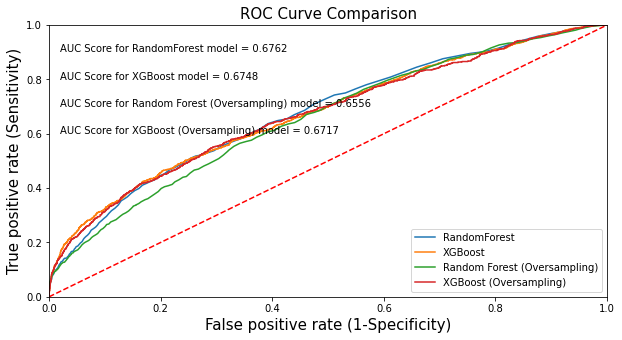

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(models, X_train, y_train, cv, ax):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.plot([0, 1], [0, 1],'r--')
    i=0
    for model in models:
        y_pred_prob = cross_val_predict(models[model], X_train, y_train, method='predict_proba', cv=cv)
        fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob[:,1])
        ax.plot(fpr, tpr, label=model)
        auc_score = round(roc_auc_score(y_train, y_pred_prob[:,1]),4)
        ax.text(x = 0.02, y = 0.9-0.1*i, s = ('AUC Score for {} model = {}'.format(model, auc_score)))
        i=i+1

    ## Labelling
    ax.set_title('ROC Curve Comparison', fontsize = 15)
    ax.set_xlabel('False positive rate (1-Specificity)', fontsize = 15)
    ax.set_ylabel('True positive rate (Sensitivity)', fontsize = 15)
    ax.legend(loc='lower right')

fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc_curve(models, X_train, y_train, strat_kf, ax)
plt.show()

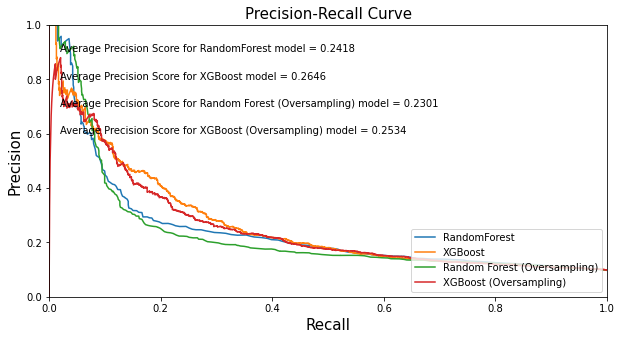

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall(models, X_train, y_train, cv, ax):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    i=0
    for model in models:
        y_pred_prob = cross_val_predict(models[model], X_train, y_train, method='predict_proba', cv=cv)
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred_prob[:,1])
        ax.plot(recall, precision, label=model)
        auc_score = round(average_precision_score(y_train, y_pred_prob[:,1]),4)
        ax.text(x = 0.02, y = 0.9-0.1*i, s = ('Average Precision Score for {} model = {}'.format(model, auc_score)))
        i=i+1

    ax.set_title('Precision-Recall Curve', fontsize = 15)
    ax.set_xlabel('Recall', fontsize = 15)
    ax.set_ylabel('Precision', fontsize = 15)
    ax.legend(loc = 'lower right')

fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_precision_recall(models, X_train, y_train, strat_kf, ax)
plt.show()

## Evaluation on Test Data

In [33]:
# Print the test scores stored earlier

df_scores

,Precision,Recall,f1-score,Accuracy,Kappa
Random Forest,0.857143,0.050704,0.095745,0.906900,0.085818
XGBoost,0.506024,0.118310,0.191781,0.903067,0.160866
RF_Bal,0.453125,0.081690,0.138425,0.901150,0.112057
XGB_Bal,0.482143,0.152113,0.231263,0.901698,0.193667


In [34]:
# Also calculate & compare AUC for roc and precision-recall curves

df_scores = df_scores.iloc[0:0]
for model in models:
    y_test_prob = models[model].predict_proba(X_test)[:,1]
    df_scores.loc[model, 'ROC_AUC score'] = roc_auc_score(y_test, y_test_prob)
    df_scores.loc[model, 'PR_AUC score'] = average_precision_score(y_test, y_test_prob)
df_scores.iloc[:,5:]

,ROC_AUC score,PR_AUC score
RandomForest,0.648275,0.237733
XGBoost,0.667500,0.275595
Random Forest (Oversampling),0.648275,0.237733
XGBoost (Oversampling),0.667500,0.275595


### Observations-
### 1) Although oversampling (SMOTE) is giving some improvement in scores in cross-validation, the performance on test data isn't different. 
### 2) Since the data is imbalanced, the PR-AUC score will be a better evaluation metric than ROC-AUC score. In our case, XGBoost is performing better in terms of both.

### Finding optimum threshold:-
### Ideally, we want to maximize recall (correctly predicted churns) while keeping the precision above a tolerance threshold. This is importance since we are targeting the churn-likely customers for discount, hence false positives can be costly for the client. 
### We can increase the recall of true (1) values by setting a lower threshold for probabilities (0.1-0.2), but with a corresponding increase in rate of false positives. This is due to the effect of class imbalance in target.

In [35]:
pd.set_option('display.max_rows',None)
y_pred_prob = xgb.predict_proba(X_test)[:,1]
scores = pd.DataFrame(columns=['Precision','Recall','Accuracy','f1-score','Kappa'])
for threshold in np.arange(0,1,0.05):
    y_pred_new = [0 if x<threshold else 1 for x in y_pred_prob]
    scores.loc[threshold,:] = [precision_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new), f1_score(y_test, y_pred_new), cohen_kappa_score(y_test, y_pred_new)]
scores.sort_values(by='Recall', ascending=False)

,Precision,Recall,Accuracy,f1-score,Kappa
0.00,0.097207,1.0,0.097207,0.17719,0.0
0.05,0.181263,0.501408,0.73138,0.266268,0.144043
0.10,0.219512,0.380282,0.808324,0.278351,0.176892
0.15,0.262557,0.323944,0.845838,0.290038,0.20463
0.20,0.294118,0.28169,0.864458,0.28777,0.21291
0.25,0.333333,0.261972,0.877327,0.293375,0.227264
0.30,0.341991,0.222535,0.882804,0.269625,0.209005
0.35,0.385417,0.208451,0.890745,0.270567,0.217144
0.40,0.410256,0.180282,0.895126,0.250489,0.203198
0.45,0.461538,0.169014,0.900055,0.247423,0.206049


In [36]:
pd.reset_option('display.max_rows')

# If we want a 60% recall of 1's (churned), we have to set a threshold of 0.1
# There will be a corresponding low precision (20%) 
# If we want to balance the precision and recall, we will go for the optimum f1-score/kappa value

y_pred_new = [0 if x<=0.8 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3297
           1       0.76      0.10      0.17       355

    accuracy                           0.91      3652
   macro avg       0.83      0.55      0.56      3652
weighted avg       0.90      0.91      0.88      3652



### Summary of Model Evaluation:-

### 1) Since our dataset is highly imbalanced, we expect the model to correctly predict many of the 0's even if its a poor one. Hence accuracy is a poor evaluation metric in this case and we will use the precision and recall for 1's (churned) as the evaluation metric for our model.

### 2) A high precision means that most of the predicted "churns" were correct while recall gives the proportion of actual "churns" that were correctly predicted. In any good classification model, there has to be a tradeoff between precision and recall, one increases as the other decreases 

### 3) Although our model has accurately predicted the 0's (No churn), the recall for 1's (churn) is very low

### 4) Overfitting is present as the model precision & recall (1's) for test data is much lower than those obtained for train set.

## 7. Model Interpretation

In [37]:
# Find the feature importance based on gini impurity for both RFC & XGB

rfc_importances = rfc.feature_importances_
xgb_importances = xgb.feature_importances_
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance_rf': rfc_importances, 'Importance_xgb': xgb_importances})

# Sort the dataframe in the descending order according to the feature importance

pd.set_option('display.float_format', lambda x: '%.5f' % x)
feature_importance = feature_importance.sort_values('Importance_rf', ascending = False)
feature_importance

,Features,Importance_rf,Importance_xgb
29,origin_kamk,0.05040,0.08172
39,diff_price_off_peak_fix,0.04386,0.06794
10,margin_gross_pow_ele,0.04230,0.03968
35,mean_price_off_peak_fix,0.04142,0.01589
14,pow_max,0.03958,0.02953
0,cons_12m,0.03920,0.05938
43,var_price_off_peak_fix,0.03631,0.03766
4,forecast_meter_rent_12m,0.03406,0.02664
13,num_years_antig,0.03400,0.02368
30,origin_ldks,0.03299,0.06879


In [38]:
feature_importance.iloc[:20,:].sum(axis=0, numeric_only=True)

# Top 20 features can capture about 70% of the feature_importance for both models

Importance_rf    0.68168
Importance_xgb   0.73400
dtype: float64

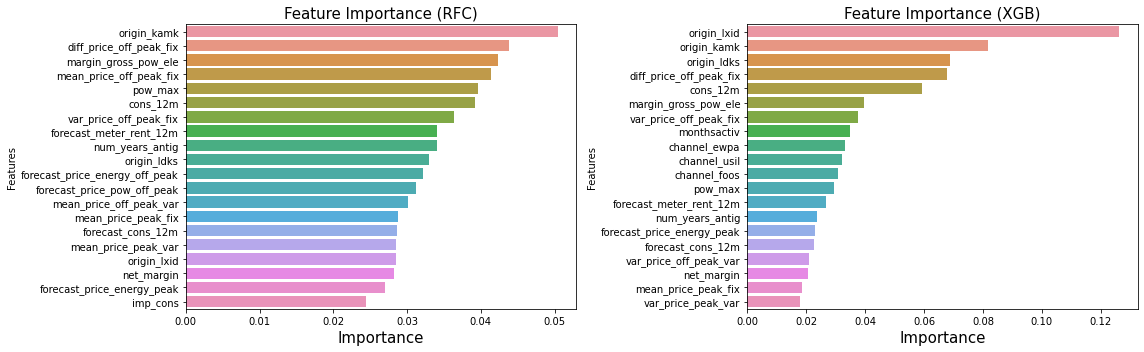

In [39]:
# Create a barplot to visualize the features based on their importance (top 20) 
# Here, it's based on total information gain

fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.barplot(x = 'Importance_rf', y = 'Features', data = feature_importance[:20], ax=axes.flat[0])

feature_importance = feature_importance.sort_values('Importance_xgb', ascending = False)
sns.barplot(x = 'Importance_xgb', y = 'Features', data = feature_importance[:20], ax=axes.flat[1])

# Add plot and axes labels
# Set text size using 'fontsize'

axes.flat[0].set_title('Feature Importance (RFC)', fontsize = 15)
axes.flat[1].set_title('Feature Importance (XGB)', fontsize = 15)

for i in range(2):
    axes.flat[i].set_xlabel('Importance', fontsize = 15)

# display the plot
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

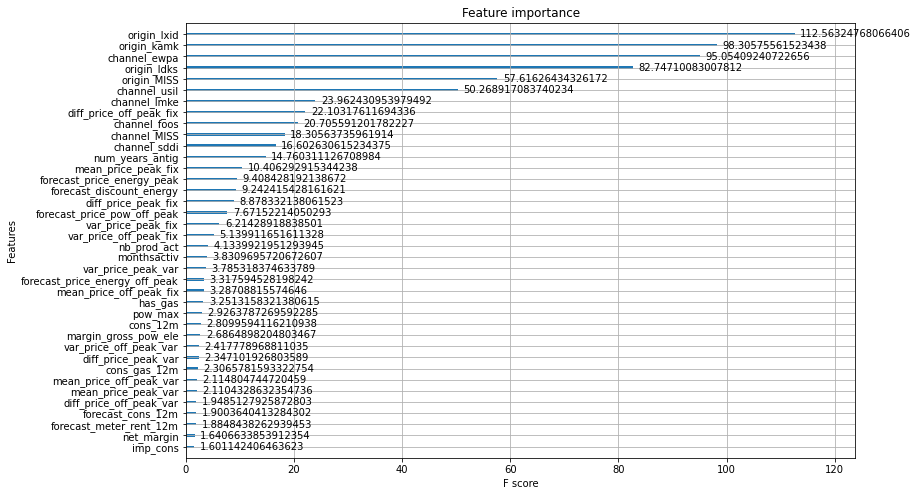

In [40]:
# Plotting using inbuilt function of xgboost (based on average gain)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
xgboost.plot_importance(xgb, ax=ax, importance_type='gain')

In [41]:
# Build Random Forest model based on best 20 features selected above

imp_feat = feature_importance.sort_values('Importance_rf', ascending = False).Features[:20].values
X = client_prices[imp_feat]
y = client_prices['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5, stratify=y)

rfc_20 = RandomForestClassifier(n_estimators = 300, random_state = 10)
rfc_20.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=10)

In [42]:
# Build XGBoost model based on best 20 features selected above

imp_feat = feature_importance.sort_values('Importance_xgb', ascending = False).Features[:20].values
X = client_prices[imp_feat]
y = client_prices['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5, stratify=y)

xgb_20 = xgboost.XGBClassifier(n_estimators = 300, random_state = 12, importance_type='total_gain', verbosity=0)
xgb_20.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='total_gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [43]:
# Cross validation on rfc_20 and xgb_20 model

models = {'Random Forest (Best 20)':rfc_20, 'XGBoost (Best 20)':xgb_20}
cross_validate_model(models, X_train, y_train, strat_kf)
cross_val_scores

,precision_mean,recall_mean,f1_mean,precision_var,recall_var,f1_var
RandomForest,0.77953,0.04323,0.08182,0.01096,0.00007,0.00025
XGBoost,0.52404,0.11559,0.18921,0.00478,0.00004,0.00015
Random Forest (Oversampling),0.54866,0.08832,0.15193,0.00563,0.00018,0.00048
XGBoost (Oversampling),0.46321,0.14096,0.21570,0.00379,0.00018,0.00042
Random Forest (Best 20),0.80174,0.04405,0.08324,0.02966,0.00029,0.00099
XGBoost (Best 20),0.47747,0.10925,0.17763,0.00728,0.00022,0.00061


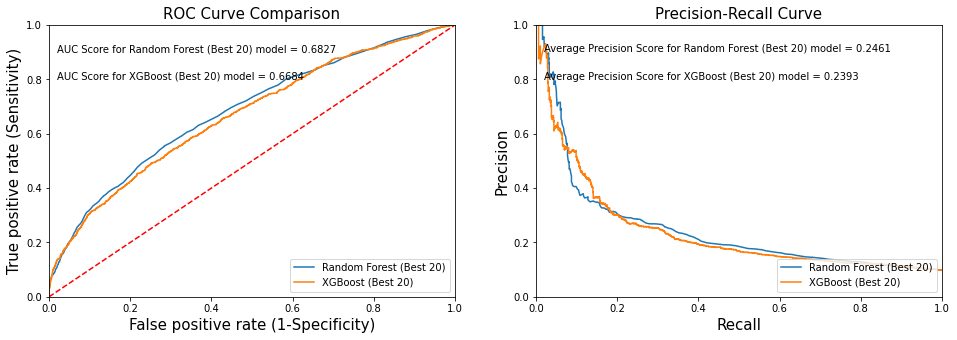

In [44]:
# Plot ROC and Precision-Recall curve for simplified models

fig, axes = plt.subplots(1,2, figsize=(16,5))
plot_roc_curve(models, X_train, y_train, strat_kf, axes[0])
plot_precision_recall(models, X_train, y_train, strat_kf, axes[1])
plt.show()

# There is a slight decrease in ROC AUC scores for each while Mean Average Precision(MAP) remain same
# Hence, we can consider only the top 20 features without loss of much predictive power

## 8. Model Finetuning & Final Results

In [45]:
# XGB model based on top 20 features 

imp_feat = feature_importance.sort_values('Importance_xgb', ascending = False).Features[:20].values
print(imp_feat)
X = client_prices.drop(['churn','id'], axis=1)
y = client_prices['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5, stratify=y)

['origin_lxid' 'origin_kamk' 'origin_ldks' 'diff_price_off_peak_fix'
 'cons_12m' 'margin_gross_pow_ele' 'var_price_off_peak_fix' 'monthsactiv'
 'channel_ewpa' 'channel_usil' 'channel_foos' 'pow_max'
 'forecast_meter_rent_12m' 'num_years_antig' 'forecast_price_energy_peak'
 'forecast_cons_12m' 'var_price_off_peak_var' 'net_margin'
 'mean_price_peak_fix' 'var_price_peak_var']


In [46]:
# We will use GridSearchCV to find optimum hyperparameters for XGBoost model

from sklearn.model_selection import GridSearchCV
params = [{'n_estimators':500,
           'scale_pos_weight':range(1,12), 
           'min_child_weight':[0,1], 
           'learning_rate':np.arange(0.1,1,0.1)},
           'subsample':0.5,
            'colsample_by_tree':0.8}]

# xgb_grid = GridSearchCV(estimator = xgb, param_grid = params, scoring='average_precision', cv = strat_kf)
# xgb_grid_model = xgb_grid.fit(X_train, y_train)
# print('Best parameters for XGB classifier: ', xgb_grid_model.best_params_, '\n')
# print('Best score for XGB Classfier: ', xgb_grid_model.best_score_)

In [47]:
# Best parameters for XGB classifier:  {'learning_rate': 0.4, 'min_child_weight': 0, 'scale_pos_weight': 1} 
best_params = {'n_estimators' : 500, 'learning_rate': 0.6, 'min_child_weight': 0, 'scale_pos_weight': 3} 

In [48]:
# Now build model with chosen optimum hyperparameters

xgb_best = xgboost.XGBClassifier(random_state = 12, importance_type='total_gain', verbosity=0, **best_params)
xgb_best.fit(X_train, y_train)

# Cross validated scores of the fine-tuned model

cross_val_scores = cross_val_scores.iloc[0:0]
models = {'XGB Base':xgb, 'XGB (Best 20)': xgb_20, 'XGB Fine-Tuned':xgb_best}
cross_validate_model(models, X_train, y_train, strat_kf)
cross_val_scores

,precision_mean,recall_mean,f1_mean,precision_var,recall_var,f1_var
XGB Base,0.52404,0.11559,0.18921,0.00478,0.00004,0.00015
XGB (Best 20),0.52404,0.11559,0.18921,0.00478,0.00004,0.00015
XGB Fine-Tuned,0.51878,0.14944,0.23186,0.00153,0.00000,0.00003


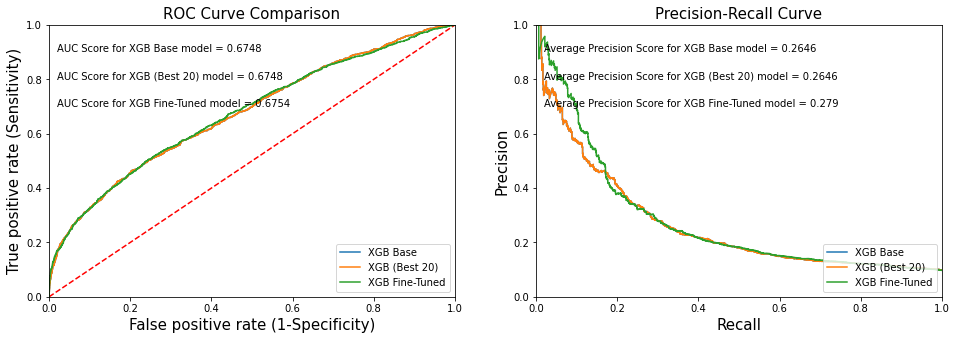

In [49]:
# Plot and compare ROC and PR curves

fig, axes = plt.subplots(1,2, figsize=(16,5))
plot_roc_curve(models, X_train, y_train, strat_kf, axes[0])
plot_precision_recall(models, X_train, y_train, strat_kf, axes[1])
plt.show()

In [50]:
# Recall for 1 can be improved by setting a better threshold

pd.set_option('display.max_rows', None)
y_pred_prob = xgb_best.predict_proba(X_test)[:,1]
scores = pd.DataFrame(columns=['Precision','Recall','Accuracy','f1-score','Kappa'])
for threshold in np.arange(0,1,0.05):
    y_pred_new = [0 if x<threshold else 1 for x in y_pred_prob]
    scores.loc[threshold,:] = [precision_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),accuracy_score(y_test, y_pred_new), f1_score(y_test, y_pred_new), cohen_kappa_score(y_test, y_pred_new)]
scores.sort_values(by='Recall', ascending=False)

,Precision,Recall,Accuracy,f1-score,Kappa
0.00000,0.09721,1.00000,0.09721,0.17719,0.00000
0.05000,0.27913,0.29014,0.85816,0.28453,0.20584
0.10000,0.31690,0.25352,0.87432,0.28169,0.21375
0.15000,0.34855,0.23662,0.88280,0.28188,0.22061
0.20000,0.38164,0.22254,0.88938,0.28114,0.22569
0.25000,0.39153,0.20845,0.89157,0.27206,0.21933
0.30000,0.41317,0.19437,0.89485,0.26437,0.21558
0.35000,0.40645,0.17746,0.89485,0.24706,0.19978
0.40000,0.43382,0.16620,0.89786,0.24033,0.19709
0.45000,0.43548,0.15211,0.89841,0.22547,0.18442


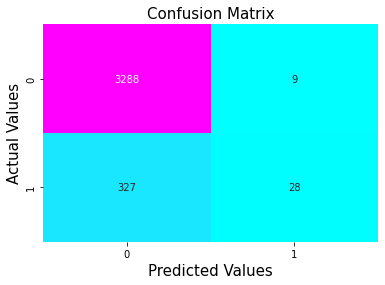

In [51]:
# Classification result of out final model on optimum threshold 
# Print the confusion matrix

y_test_pred = [0 if x<=0.8 else 1 for x in y_pred_prob]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap = 'cool', cbar = False)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Importance_xgb', ylabel='Features'>

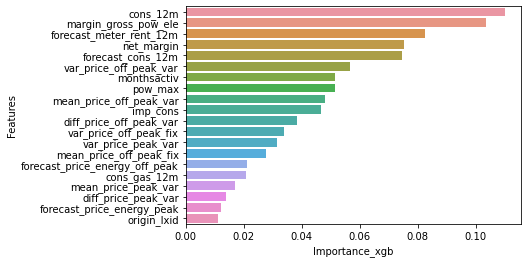

In [52]:
# Feature importance for fine tuned model

important_features = pd.DataFrame({'Features': X_train.columns, 'Importance_xgb': xgb_best.feature_importances_})

important_features = important_features.sort_values('Importance_xgb', ascending = False)

# fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.barplot(x = 'Importance_xgb', y = 'Features', data = important_features[:20])

In [53]:
print('Top 20 important features (total information gain based on gini impurity) for predicting churn are :-')
important_features.iloc[:20]

Top 20 important features (total information gain based on gini impurity) for predicting churn are :-


,Features,Importance_xgb
0,cons_12m,0.10994
10,margin_gross_pow_ele,0.10341
4,forecast_meter_rent_12m,0.08258
12,net_margin,0.07532
2,forecast_cons_12m,0.07450
41,var_price_off_peak_var,0.05672
15,monthsactiv,0.05160
14,pow_max,0.05136
33,mean_price_off_peak_var,0.04811
9,imp_cons,0.04658


In [54]:
# Interpreting the result of an individual instance using LIME package

import lime
import lime.lime_tabular

prob_predict = lambda x: xgb_best.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = X_train.columns, 
                                                   class_names=['Not churned','Churned'],kernel_width=5)

                                                  
instance = X_test.iloc[2252,:]
# print(instance)
exp = explainer.explain_instance(instance, prob_predict)
exp.show_in_notebook(show_all=False)

# For the particular instance of churn, cons_gas_12m, pow_max, origin, channel are the biggest predictors for churn

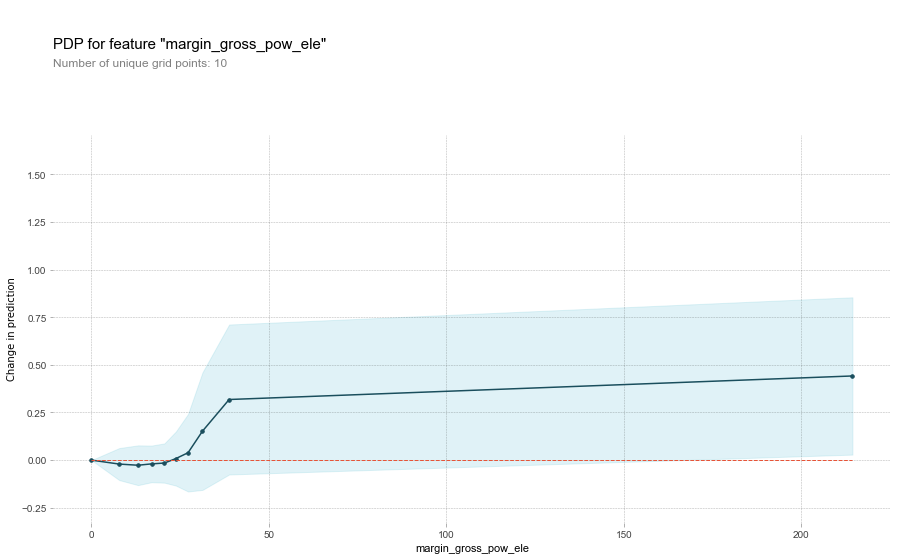

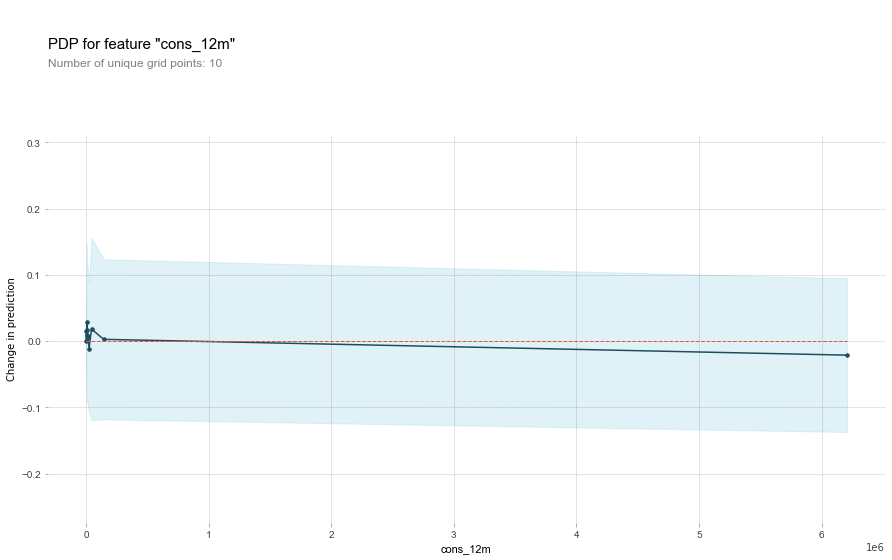

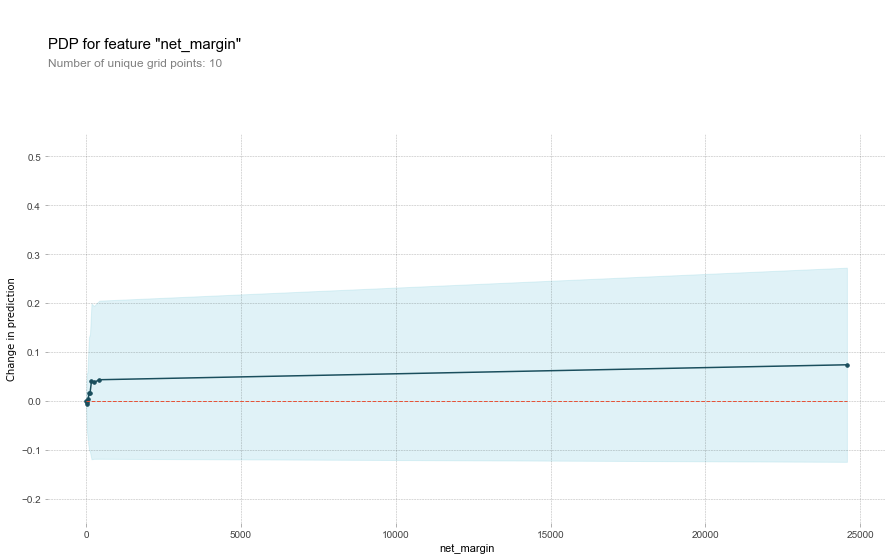

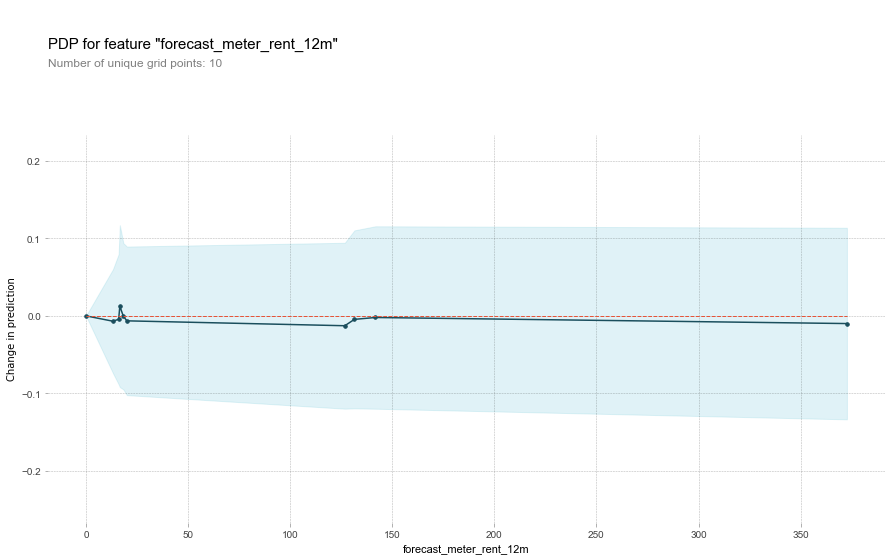

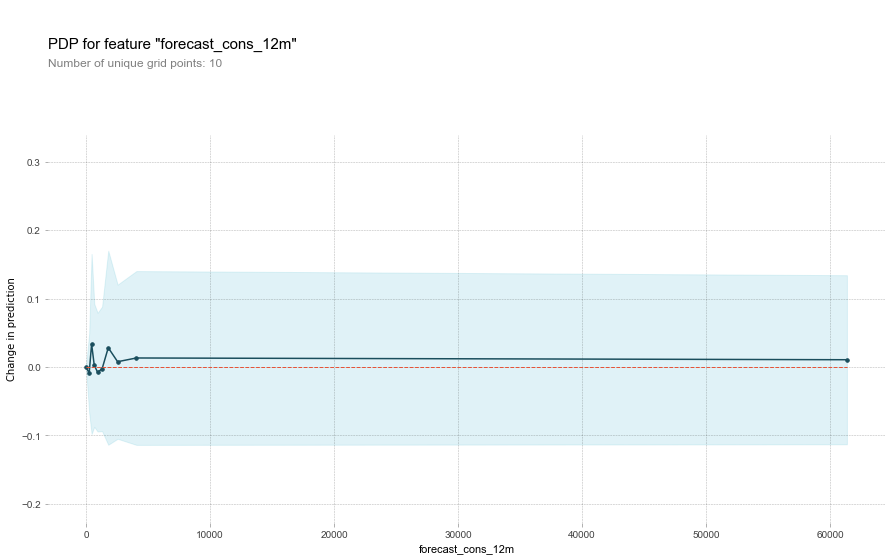

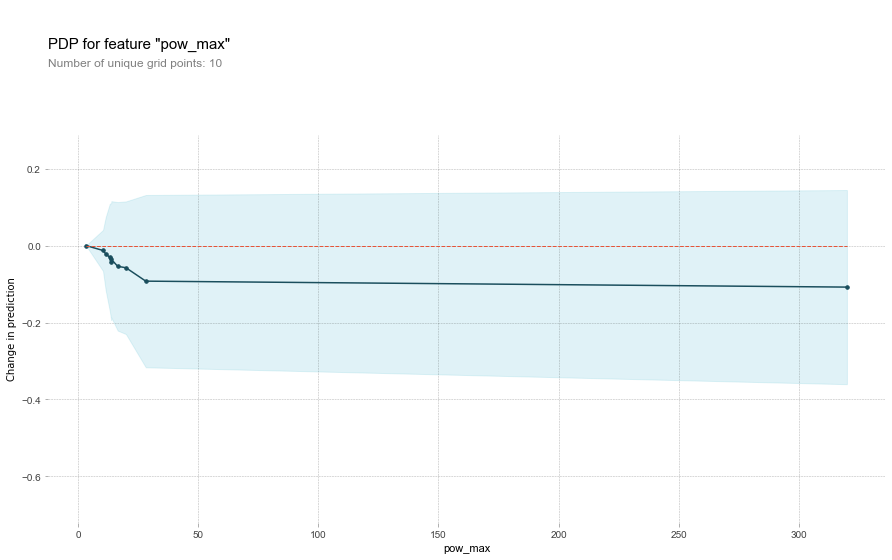

In [55]:
# Create the partial dependency plot for top 6 features

# ! pip install pdpbox
import pdpbox.pdp as pdp
from sklearn import tree

imp_feat = ['margin_gross_pow_ele', 'cons_12m', 'net_margin', 'forecast_meter_rent_12m', 'forecast_cons_12m', 'pow_max']

for col in imp_feat:
    pdp_feat = pdp.pdp_isolate(xgb_best, X_test, X_test.columns, feature=col)
    fig, axes = pdp.pdp_plot(pdp_feat, col)
    plt.ylabel("Change in prediction")
    plt.savefig('pdp_{}.png'.format(col))
    
# x-axis shows the feature values and y-axis gives the predicted probability of churn

## 9. Conclusion

### 1) Electric power margins on a client (represented by margin_gross_pow_ele and net_margin) and the consumption (represented by cons_12m and pow_max) emerge as the strongest predictors
### 2) Margin has a positive correlation with churn, which means the customers who are most profitable may also be the most likely to churn.
### 3) Consumption has a negative correlation meaning those customers who are likely to churn may have a reduced consumption now.